In [2]:
!pip install yfinance

!pip install mpl_finance

In [3]:
pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in ./opt/anaconda3/lib/python3.8/site-packages (0.12.7a12)
Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from datetime import date

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)

In [20]:
name = 'GOOGL'
today = date.today()
ticker = yfinance.Ticker(name)

df = ticker.history(interval="1d",start="2021-01-01",end=today)

print(df) #Let's see how our data looks



                   Open         High          Low        Close   Volume  \
Date                                                                      
2021-01-04  1760.000000  1762.489990  1707.140015  1726.130005  1866200   
2021-01-05  1725.089966  1746.829956  1716.900024  1740.050049  1018000   
2021-01-06  1700.260010  1743.969971  1696.099976  1722.880005  2329400   
2021-01-07  1726.760010  1777.819946  1726.760010  1774.339966  2096800   
2021-01-08  1777.160034  1799.359985  1761.219971  1797.829956  1774200   
...                 ...          ...          ...          ...      ...   
2021-04-14  2267.429932  2267.429932  2236.020020  2241.909912  1050100   
2021-04-15  2261.949951  2296.000000  2251.169922  2285.250000  1458700   
2021-04-16  2289.239990  2294.239990  2270.919922  2282.750000  1313600   
2021-04-19  2270.179932  2304.090088  2270.179932  2289.760010  1514500   
2021-04-20  2297.489990  2299.000000  2257.120117  2279.010010  1113400   

            Dividends  S

In [22]:
df = df.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1)
print (df)

                   Open         High          Low        Close
Date                                                          
2021-01-04  1760.000000  1762.489990  1707.140015  1726.130005
2021-01-05  1725.089966  1746.829956  1716.900024  1740.050049
2021-01-06  1700.260010  1743.969971  1696.099976  1722.880005
2021-01-07  1726.760010  1777.819946  1726.760010  1774.339966
2021-01-08  1777.160034  1799.359985  1761.219971  1797.829956
...                 ...          ...          ...          ...
2021-04-14  2267.429932  2267.429932  2236.020020  2241.909912
2021-04-15  2261.949951  2296.000000  2251.169922  2285.250000
2021-04-16  2289.239990  2294.239990  2270.919922  2282.750000
2021-04-19  2270.179932  2304.090088  2270.179932  2289.760010
2021-04-20  2297.489990  2299.000000  2257.120117  2279.010010

[74 rows x 4 columns]


In [ ]:
def getSupport(df,i):
    supportPrice = 0
    if df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]:
        supportPrice = df['Low'][i]
    
    return supportPrice
    

In [30]:
def getResistance(df,i):
    resistancePrice = 0
    if df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]:
        resistancePrice = df['High'][i]
        
    return resistancePrice

In [51]:
allPrices = []
for i in range(2, df.shape[0] - 2):
    supportPrice = getSupport(df,i)
    resistantPrice = getResistance(df,i)
    if supportPrice != 0:
        allPrices.append((i,supportPrice))
    elif resistantPrice != 0:
        allPrices.append((i,resistantPrice))
        
allPrices

[(4, 1799.3599853515625),
 (9, 1711.7099609375),
 (29, 2145.139892578125),
 (37, 2001.010009765625),
 (39, 2094.739990234375),
 (43, 2113.739990234375),
 (52, 2002.9300537109375),
 (55, 2067.60009765625)]

In [66]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df

,Date,Open,High,Low,Close
Date,,,,,
2021-01-04,18631.0,1760.000000,1762.489990,1707.140015,1726.130005
2021-01-05,18632.0,1725.089966,1746.829956,1716.900024,1740.050049
2021-01-06,18633.0,1700.260010,1743.969971,1696.099976,1722.880005
2021-01-07,18634.0,1726.760010,1777.819946,1726.760010,1774.339966
2021-01-08,18635.0,1777.160034,1799.359985,1761.219971,1797.829956
...,...,...,...,...,...
2021-04-14,18731.0,2267.429932,2267.429932,2236.020020,2241.909912
2021-04-15,18732.0,2261.949951,2296.000000,2251.169922,2285.250000
2021-04-16,18733.0,2289.239990,2294.239990,2270.919922,2282.750000


In [120]:
#get rid of prices near to one another reduce noise

mean =  np.mean(df['High'] - df['Low']) #rough estimate of volatility

allPrices = [] 

for i in range(2, df.shape[0] - 2):
    supportPrice = getSupport(df,i)
    resistantPrice = getResistance(df,i)
    if supportPrice != 0:
        if np.sum([abs(supportPrice-x) < mean for x in allPrices]) == 0:
            allPrices.append((i,supportPrice))
    elif resistantPrice != 0:
        if np.sum([abs(resistantPrice-x) < mean for x in allPrices]) == 0:
            allPrices.append((i,resistantPrice))
        
allPrices

[(4, 1799.3599853515625),
 (9, 1711.7099609375),
 (29, 2145.139892578125),
 (37, 2001.010009765625),
 (39, 2094.739990234375)]

In [118]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6,colorup='green', colordown='red', alpha=1)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)

    
  for level in allPrices:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')

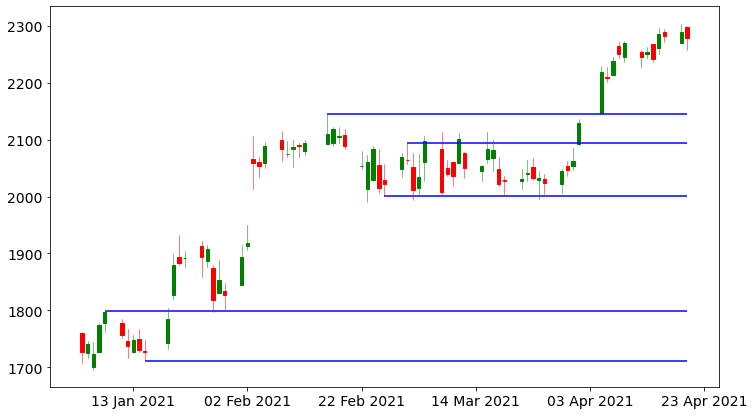

In [119]:
plot_all()